In [1]:
### 데이터 읽어들이기 (독립변수들..)
# 데이터프레임 변수명 : df
# 데이터 : data/003_농어의_길이_높이_두께_데이터.csv

In [2]:
import pandas as pd 

In [3]:
file_path = "./data/03_농어의_길이_높이_두께_데이터.csv"
df =  pd.read_csv(file_path)

df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [4]:
### 데이터프레임을 numpy 배열 타입으로 변환하기
# - 데이터프레임에는 numpy 배열 타입으로 변환하는 함수가 있습니다.
### 변수명 : perch_full

In [5]:
perch_full = df.to_numpy()
perch_full
print(perch_full.shape)

(56, 3)


In [6]:
### 종속 데이터 : 무게를 사용..
import numpy as np

### 농어의 무게 데이터 (농속변수 : target data)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [7]:
perch_weight.shape

(56,)

In [8]:
### 훈련 : 테스트 = 70 : 30 으로 분류하기, 랜던값 42
# 변수명 : train_input, test_input, train_target, test_target
# 각 변수의 행렬 차원값 확인하기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(perch_full, perch_weight,  
                               test_size=0.3, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(39, 3) (39,)
(17, 3) (17,)


In [9]:
### 특성공학을 적용하여 특성 늘리기
### 훈련데이터 특성공학 적용 변수명 : train_poly
### 테스트데이터 특성공학 적용 변수명 : test_poly

In [10]:
### 라이브러리 불러들이기
from sklearn.preprocessing import PolynomialFeatures

In [11]:
### 클래스 생성하기
# -절편 없애기 : include_bias=False
# degree=2 : 특성을 생성할 때는 차원의 값을 이용해서 객수가 만들어집니다.
#          : 디폴트로 2입니다.
poly = PolynomialFeatures(degree=2, include_bias=False)  # poly = PolynomialFeatures(include_bias=False) 
 
### 패턴 조합 찾기(훈련데이터)
# - 패턴 조합을 찾을 때는 훈련데이터를 이용합니다.
poly.fit(train_input)

### 찾은 패턴 조합으로 변환하기(훈련데이터)
train_poly = poly.transform(train_input)

### 찾은 패턴 조합으로 테스트데이터 변환하기
test_poly = poly.transform(test_input)


print(train_poly.shape, test_poly.shape)

(39, 9) (17, 9)


In [12]:
### 특성의 패턴조합 확인하기(어떻게 계산이 이루어 졌는지)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### 다중회귀 모델 훈련하기

In [13]:
### 패키지
from sklearn.linear_model import LinearRegression

In [14]:
### 클래스(모델) 생성하기
lr = LinearRegression()
lr

LinearRegression()

In [15]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
### 정확도(평가) 확인하기 (훈련데이터, 테스트데이터)
train_score = lr.score(train_poly, train_target) 
test_score = lr.score(test_poly, test_target) 

print(train_score, test_score)

0.9898271546307024 0.971377160062965


### 특성의 갯수 늘리기

In [17]:
### degree의 갯수를 큰값으로 설정
poly = PolynomialFeatures(degree=5, include_bias=False)

### 특성 조합의 패턴(조합) 찾기
poly.fit(train_input)

### 찾은 패턴(조합)으로 변환하기
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
train_poly.shape, test_poly.shape

((39, 55), (17, 55))

In [19]:
### 55개 특성 조합의 패턴 확인하기
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [20]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [21]:
### 정확도(결정계수)
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)

In [22]:
train_score, test_score

(0.9999999999999992, -20.195038576390044)

In [23]:
### (해석)
# - 훈련의 결과로만 볼때는 매우 우수한 모델로 판단되나,
# - 테스트의 결과로 볼 때 매우 큰 "과대적합"이 발생하였음
# - 따라서, degree 5로 했을때 보다는 2로 했을때늬 훈련 모델을 선택하는
#   것이 타탕함
### 가끔은, 훈련모델이 1에 가까울수록 
#           테스트결과가 안좋게 나오는 경우가 있음

### 규제

In [24]:
"""
< 규제 >
 - 과대적합을 줄이는 방법
 - 과대적합이 일어나지 않도록 제어하는 개념
 - 계수(기울기)값의 크기를 줄이는 방법으로 - 규제한다라고 칭합니다.
 
< 규제 개념이 적용된 선형회귀 모델 >
 - 릿지(ridge), 라소(lasso) 회귀모델이 있음
 - 주로 릿지 방식을 선호하는 편임(보편적으로 과대적합 해소를 잘해줌)
 
< 규제를 위해서는 ...>
 - 데이터의 정규화(표준화) 작업이 선행되어야 함
 - 정규화(표준화) : 단위(값의 크기 범위)가 다양한 특성들의 데이터를
                  : 지수 형태의 데이터 범위로 일괄 되게 하는 방식
"""

'\n< 규제 >\n - 과대적합을 줄이는 방법\n - 과대적합이 일어나지 않도록 제어하는 개념\n - 계수(기울기)값의 크기를 줄이는 방법으로 - 규제한다라고 칭합니다.\n \n< 규제 개념이 적용된 선형회귀 모델 >\n - 릿지(ridge), 라소(lasso) 회귀모델이 있음\n - 주로 릿지 방식을 선호하는 편임(보편적으로 과대적합 해소를 잘해줌)\n \n< 규제를 위해서는 ...>\n - 데이터의 정규화(표준화) 작업이 선행되어야 함\n - 정규화(표준화) : 단위(값의 크기 범위)가 다양한 특성들의 데이터를\n                  : 지수 형태의 데이터 범위로 일괄 되게 하는 방식\n'

In [25]:
"""
< 정규화 순서 >
 - 정규화 클래스 : StandardScaler()
 - 표준점수 생성 : fit() 함수 사용(스스로 표준화할 값의 패턴 찾기)
 - 변환하기 : 찾은 패턴으로 데이터 변환하기
 - 
"""

'\n< 정규화 순서 >\n - 정규화 클래스 : StandardScaler()\n - 표준점수 생성 : fit() 함수 사용(스스로 표준화할 값의 패턴 찾기)\n - 변환하기 : 찾은 패턴으로 데이터 변환하기\n - \n'

In [26]:
"""
< 규제 개념이 적용된 모델 >
 (릿지 모델)
  - 계수를 "제곱"한 값을 기준으로 규제를 적용
  - 사용패키지 : linear_model
  - 사용클래스 : Ridge
  - 훈련, 평가, 테스트 : fit(), score(), predict()
  
 (라소 모델)
  - 계수의 "절대값"을 기준으로 규제를 적용
  - 사용패키지 : linear_model
  - 사용클래스 : Lasso
  - 훈련, 평가, 테스트 : fit(), score(), predict()
"""

'\n< 규제 개념이 적용된 모델 >\n (릿지 모델)\n  - 계수를 "제곱"한 값을 기준으로 규제를 적용\n  - 사용패키지 : linear_model\n  - 사용클래스 : Ridge\n  - 훈련, 평가, 테스트 : fit(), score(), predict()\n  \n (라소 모델)\n  - 계수의 "절대값"을 기준으로 규제를 적용\n  - 사용패키지 : linear_model\n  - 사용클래스 : Lasso\n  - 훈련, 평가, 테스트 : fit(), score(), predict()\n'

### 정규화 하기

In [27]:
### 데이터는 train_poly, test_poly 를 계속해서 사용

In [28]:
### 사용 패키지 (전처리 라이브러리 : preprocessing)
from sklearn.preprocessing import StandardScaler

In [29]:
### 클래스 생성
ss = StandardScaler()
ss

StandardScaler()

In [30]:
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_poly)

StandardScaler()

In [31]:
### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [32]:
train_scaled.shape, test_scaled.shape

((39, 55), (17, 55))

In [33]:
### 평균, 표준편차 확인하기
ss.mean_, ss.scale_

(array([2.90871795e+01, 8.24512821e+00, 4.94307692e+00, 9.22189231e+02,
        2.64592436e+02, 1.58638718e+02, 7.62897179e+01, 4.57141154e+01,
        2.75046359e+01, 3.13859681e+04, 9.08934599e+03, 5.44671063e+03,
        2.64311561e+03, 1.58341599e+03, 9.52051059e+02, 7.71640873e+02,
        4.62216692e+02, 2.77893812e+02, 1.67689323e+02, 1.12772910e+06,
        3.28685226e+05, 1.96777006e+05, 9.61247987e+04, 5.75414118e+04,
        3.45600184e+04, 2.82046162e+04, 1.68839409e+04, 1.01414311e+04,
        6.11198139e+03, 8.30214542e+03, 4.97058311e+03, 2.98624024e+03,
        1.80023084e+03, 1.08894991e+03, 4.21524818e+07, 1.23342764e+07,
        7.37587706e+06, 3.61947635e+06, 2.16436604e+06, 1.29826472e+06,
        1.06509761e+06, 6.36948054e+05, 3.82114993e+05, 2.29954055e+05,
        3.14282071e+05, 1.87978037e+05, 1.12798128e+05, 6.79026129e+04,
        4.10060291e+04, 9.29855329e+04, 5.56311566e+04, 3.33936168e+04,
        2.01110834e+04, 1.21512827e+04, 7.36573011e+03]),
 array

# 릿지 모델 훈련하기

In [34]:
### 사용 패키지
from sklearn.linear_model import Ridge

In [35]:
# 클래스(모델) 생성하기
ridge = Ridge()
ridge

Ridge()

In [36]:
# 훈련시키기
ridge.fit(train_scaled, train_target)

Ridge()

In [37]:
# 정확도(결정계수) 확인하기 (훈련 및 테스트)
train_scroe = ridge.score(train_scaled, train_target)
test_scroe = ridge.score(test_scaled, test_target)

In [38]:
train_scroe, test_scroe

(0.9889900259477936, 0.9806943210368351)

In [39]:
### (해석)
# - 훈련 결과는 특성공학만을 적용했을때보다는 낮게 나왔음
# - 하지만, 테스트 결과는 매우 높게 나왔으며,
#   과소적합이 일어나지 않았으며,
#   과대적합 또한 일어나지 않은 좋은 모델로 판단됨

### 규제 강도 조절하기

In [40]:
"""
< 규제 강도 하이퍼파라메터 튜닝 >
 - 규제 강도 속성 변수 : alpha
 - alpha 값을 조정하여 훈련 정확도(결정계수)의 변화를 확인하여
   가장 적합한 값을 선정(하이퍼파라메터 튜닝한다라고 칭합니다.)
   
 (alpha 값 튜닝방법)
  - 정해진 방법은 없으며, 임의 범위의 값을 선정하여 반복하면서 찾음
  - 훈련데이터 및 테스트데이터로 각각 임의 값을 적용하여 평가하여
  - 결정계수 값을 이용하여 훈련 및 테스트 정확도(결정계수) 시각화 함
  - 훈련 및 테스트 정확도(결정계수)의 값이 가장 가까워지는 지점의
  - x축의 값을 alpha 값으로 결정하여 사용하게됨
  
 - alpha 의 범위
  : 일반적으로 튜닝시 사용하는 범위는 0.001, 0.01, 0.1, 1, 10, 100 을 사용
  : 0.001부터 10배씩 늘려가면서 정확도(결정계수)를 확인하게됨
"""

'\n< 규제 강도 하이퍼파라메터 튜닝 >\n - 규제 강도 속성 변수 : alpha\n - alpha 값을 조정하여 훈련 정확도(결정계수)의 변화를 확인하여\n   가장 적합한 값을 선정(하이퍼파라메터 튜닝한다라고 칭합니다.)\n   \n (alpha 값 튜닝방법)\n  - 정해진 방법은 없으며, 임의 범위의 값을 선정하여 반복하면서 찾음\n  - 훈련데이터 및 테스트데이터로 각각 임의 값을 적용하여 평가하여\n  - 결정계수 값을 이용하여 훈련 및 테스트 정확도(결정계수) 시각화 함\n  - 훈련 및 테스트 정확도(결정계수)의 값이 가장 가까워지는 지점의\n  - x축의 값을 alpha 값으로 결정하여 사용하게됨\n  \n - alpha 의 범위\n  : 일반적으로 튜닝시 사용하는 범위는 0.001, 0.01, 0.1, 1, 10, 100 을 사용\n  : 0.001부터 10배씩 늘려가면서 정확도(결정계수)를 확인하게됨\n'

In [41]:
### 시각화 패키지
import matplotlib.pyplot as plt

In [42]:
### alpha 값을 이용한 결과를 담기 위한 변수
train_score = []
test_score  = []

In [43]:
### alpha 값의 범위 지정
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

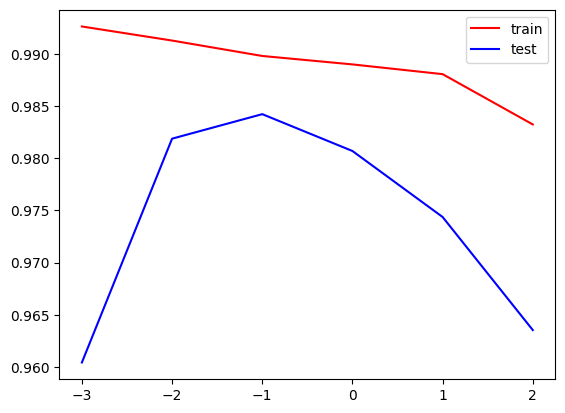

In [44]:
### alpha 값(규제강도)를 변경하면서 반복 수행한 결과 담기
for alpha in alpha_list : 
    ### 모델 생성하기 : 생성시 규제강도 속성 값 정의
    ridge = Ridge(alpha = alpha)
    
    ### 훈련시키기
    ridge.fit(train_scaled, train_target)
    
    ### 정확도(결정계수) 결과 변수에 담기
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
### 훈련 및 테스트 정확도(결정계수) 값을 이용하여 시각화하기
plt.plot(np.log10(alpha_list), train_score, label="train", c="red")
plt.plot(np.log10(alpha_list), test_score, label="test", c="blue")


plt.legend()
plt.show()

In [ ]:
### 위 시각화에서 훈련과 테스트의 정확도를 이용해서
# - 과소적합이 일어나지 않는 지점 중에 두 거리가 가장 가가운 지점을
#   선택하면 됩니다. 선택된 값이 하이퍼파라메터 결정값이 됩니다.

In [53]:
### 릿지모델에 알파값 0.1 적용하여 훈련시키기  # 그래프에서 x축 -1 인 지점이 0.1 임
# 훈련모델 생성하기 : 알파값 적용
ridge = Ridge(alpha = 0.1)    # 디폴트는 alpha = 1 임
ridge

Ridge(alpha=0.1)

In [54]:
### 훈련 시키기
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [55]:
### 알파값 0.1 일때 릿지모델 정확도 확인하기
train_score = ridge.score(train_scaled, train_target) 
test_score = ridge.score(test_scaled, test_target)     

In [56]:
train_score, test_score

(0.9897983159614502, 0.9842243738800763)

### 라쏘모델 사용하기

In [57]:
### 패키지 적용하기
from sklearn.linear_model import Lasso

In [58]:
### 클래스 (모델 생성하기)
lasso = Lasso()
lasso

Lasso()

In [59]:
### 훈련시키기
lasso.fit(train_scaled, train_target)

Lasso()

In [60]:
### 정확도(결정계수) 확인하기 : 훈련 및 테스트
train_scroe = lasso.score(train_scaled, train_target)
test_scroe = lasso.score(test_scaled, test_target)

In [61]:
### (해석) 
train_scroe, test_scroe

(0.9891841592343474, 0.9816966371762467)

In [ ]:
### 라쏘 알파값 튜닝하기

In [64]:
### alpha 값을 이용한 결과를 담기 위한 변수
train_score = []
test_score  = []

In [65]:
### alpha 값의 범위 지정
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.369e+02,

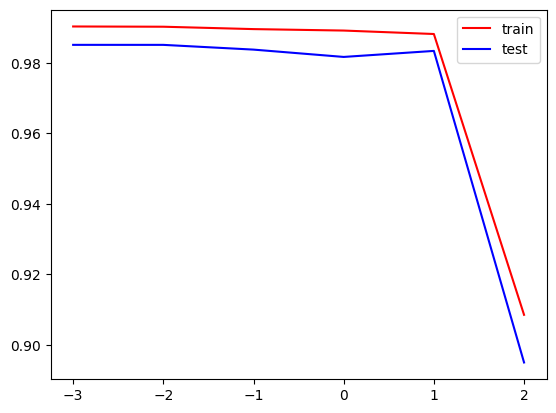

In [66]:
### alpha 값(규제강도)를 변경하면서 반복 수행한 결과 담기
for alpha in alpha_list : 
    ### 모델 생성하기 : 생성시 규제강도 속성 값 정의
    lasso = Lasso(alpha = alpha)
    
    ### 훈련시키기
    lasso.fit(train_scaled, train_target)
    
    ### 정확도(결정계수) 결과 변수에 담기
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
### 훈련 및 테스트 정확도(결정계수) 값을 이용하여 시각화하기
plt.plot(np.log10(alpha_list), train_score, label="train", c="red")
plt.plot(np.log10(alpha_list), test_score, label="test", c="blue")


plt.legend()
plt.show()

In [72]:
### 릿지모델에 알파값 0.001 적용하여 훈련시키기  # 그래프에서 x축 -3 인 지점이 10 임
# 훈련모델 생성하기 : 알파값 적용
lasso = Lasso(alpha = 0.001)    # 디폴트는 alpha = 1 임
lasso

Lasso(alpha=0.001)

In [73]:
### 훈련 시키기
lasso.fit(train_scaled, train_target)

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [74]:
### 알파값 0.1 일때 릿지모델 정확도 확인하기
train_score = lasso.score(train_scaled, train_target) 
test_score = lasso.score(test_scaled, test_target)     

In [75]:
train_score, test_score

(0.9903418168463881, 0.9851251560422752)

In [ ]:
# 릿지모델(alpha=0.1)   ->  (0.9897983159614502, 0.9842243738800763)
# 라쏘모델(alpha=1)     ->  (0.9891841592343474, 0.9816966371762467)
# 라쏘모델(alpha=0.001) ->  (0.9903418168463881, 0.9851251560422752)

# 최종적으로 라쏘모델로 선택

In [ ]:
### 튜닝 시에 시각화 해석 방법
# - 훈련곡선이 테스트곡선보다 위에 있어야 과소적합이 없는 것임
# - 훈련곡선이 일정 흐름을 유지하면서, 급격하게 떨어지는 지점까지의 범위에서
#   보통 값을 결정함
# - 값을 결정할 때는 두 곡선의 차이가 가장 작은 지점을 선택합니다.
# - 또는 각 지점의 차이를 확인 후 가장 낮은 값의 지점을 선택하기도 합니다.
# - 같은 차이값을 보인다면, 정확도가 높은 알파값을 결정하면 됨

In [ ]:
### ---- 실습 ---------

In [ ]:
### 선형, 다중, 다항, 릿지, 라쏘 연습...